# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "/home/hjorth/HBP/DELME/networks/pd0_5k_swap"
updated_network = "/home/hjorth/HBP/DELME/networks/pd2_5k_swap"
output_network =  "/home/hjorth/HBP/DELME/networks/pd2_output_network"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2"

# original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD0"
# updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD2"

In [2]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir)

Loading 5000 neurons with 2453190 synapses and 319 gap junctions
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/12/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/12/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/14/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/14/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/18/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220

In [3]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()

Writing new network to /home/hjorth/HBP/DELME/networks/pd2_output_network/network-synapses.hdf5
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/18/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/23/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/ispn/25/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/ispn/26/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/32/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/33/parameters.json
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/4/parameters.json
Missing parameter.json : /home/hjorth/HBP/Ba

In [4]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

Fri Sep  2 17:52:44 2022    whysoslow.profile

         224380053 function calls (220626790 primitive calls) in 395.559 seconds

   Ordered by: cumulative time
   List reduced from 294 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  395.559  395.559 {built-in method builtins.exec}
        1    0.000    0.000  395.559  395.559 <string>:1(<module>)
        1    0.848    0.848  395.559  395.559 swap_to_degenerated_morphologies.py:66(write_new_network_file)
        1    1.848    1.848  389.901  389.901 swap_to_degenerated_morphologies_extended.py:204(filter_synapses)
   755199    9.644    0.000  251.598    0.000 swap_to_degenerated_morphologies.py:238(filter_synapses_helper)
   755199   28.973    0.000  212.779    0.000 swap_to_degenerated_morphologies.py:270(filter_axonal_synapses_helper)
  2588219   13.279    0.000  171.407    0.000 dataset.py:722(__getitem__)
        1    1.716    1.716  126.275  126.2

Loading 5000 neurons with 2453190 synapses and 319 gap junctions
Loading 5000 neurons with 1226571 synapses and 295 gap junctions
Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/12/parameters.json


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Missing parameter.json : /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/12/parameters.json
Figure written: /home/hjorth/HBP/DELME/networks/pd2_output_network/figures/input-to-1-dSPN_4-and-internal-synapses.png


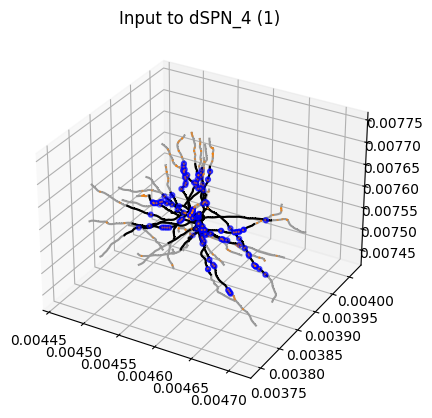

In [5]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)